In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
def save_optimizde_params(df,outname):
    # df: one iteration with potenital best results
    df.index = np.arange(df.shape[0])
    
    for ind in df.index:
        if df.loc[ind,'val_loss'] == np.min(df['val_loss']): best_epoch = ind
    
    df = df.loc[best_epoch,:]
    df = df.transpose()
    print(df)
    df.to_csv(outname)

In [3]:
def load_data_deep_results(infile,ylim=True):
    # load the iteration that has the lowest val_loss across all epechos
    df = pd.read_csv(infile)
    ### step 0: remove those ones with dense2>dense1 or with train and r2 negative
    #sel_ind = [ite for ite in df.index 
    #           if df.loc[ite,'dense2']<=df.loc[ite,'dense1'] and df.loc[ite,'val_coef_det_k']>0 and df.loc[ite,'coef_det_k']>0]
    #df = df.loc[sel_ind,:]
    
    # step 1: add iteration as index
    new_index = []
    ite = 0
    for ind in df.index: 
        if df.loc[ind,'epoch'] == 0: ite += 1
        new_index.append(ite)
    df.index = new_index
    print(df.shape)
    print('Number of iterations:',ite)
    # step 2: find the iteration with lowest val_loss
    lst = [] # [(min_val_loss,ite,id)]
    for it in range(ite):
        it += 1
        dfs = df.loc[it,:]
        dfs.index = np.arange(len(dfs.index))
        lst.append((np.min(dfs['val_loss']),it,np.max(dfs['val_coef_det_k'])))
        #lst.append((dfs['val_loss'].values[-1],it))
        #lst.append((np.mean(dfs['val_loss'].values[-50:]),it))
    #for item in lst: print(item)
    accummed_lst = []
    for item in lst: 
        if len(accummed_lst) == 0 or item[0] < accummed_lst[-1]:
            accummed_lst.append(item[0])
        else: accummed_lst.append(accummed_lst[-1])
            
    plt.figure(figsize=(3.8,3))
    plt.plot(np.arange(len(accummed_lst)),np.sqrt(accummed_lst))
    plt.scatter(np.arange(len(accummed_lst)),[item[0]**0.5 for item in lst])
    plt.xlabel('Iterations')
    plt.ylabel('RMSE ($^\circ$C)')
    if ylim: plt.ylim(0,20)
    plt.show()
    
    
    lst.sort()
    print('Best one:',lst[0])
    
    ite_best = lst[0][1]
    
    # step 3: return a dataframe for selected iteration
    save_optimizde_params(df.loc[ite_best,:],infile+'_optimized.csv')
    return df.loc[ite_best,:]

In [4]:
def plot(df,outname=None,ylim=True):
    # df is from load_data function
    sns.set(style='white')
    sns.set_style("ticks")
    plt.figure(figsize=(3.8,3))
    plt.scatter(df['epoch'],np.sqrt(df['loss']),label='training')
    plt.scatter(df['epoch'],np.sqrt(df['val_loss']),label='validation')
    #plt.scatter(df['epoch'],np.sqrt(df['test_loss']),label='test')
    
    print('')
    print('train:',df['coef_det_k'].values[np.argmin(df['val_loss'].values)])
    print('validation:',df['val_coef_det_k'].values[np.argmin(df['val_loss'].values)])
    #print('test:',df['test_val_det_k'].values[np.argmin(df['val_loss'].values)])
    plt.xlabel('Epochs')
    #plt.ylabel('$R^2$')
    plt.ylabel('RMSE ($^\circ$C)')
    if ylim:
        ylim = list(plt.gca().get_ylim())
        ylim[0] = 0
        ylim[1] = 20
        plt.ylim(ylim)

    plt.legend()
    plt.tight_layout()
    if outname is not None: plt.savefig(outname,dpi=400)
    plt.show()

ResNetRed_UniDist
(17675, 34)
Number of iterations: 120


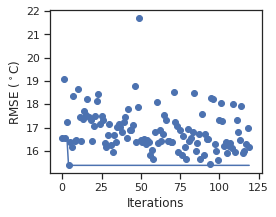

Best one: (236.44944947248055, 5, 0.7156785017212696)
epoch                      97
coef_det_k           0.953205
dense1                    512
dense2                    256
dilation2                   5
dilation3                   1
dilation4                   3
dropout1             0.251307
dropout2            0.0888746
epochs                    500
filters                   512
kernel_size1               21
kernel_size21               9
kernel_size22               7
kernel_size23               9
kernel_size31               3
kernel_size32              11
kernel_size33              21
kernel_size41               3
kernel_size42              21
loss                  37.8428
lr                     0.0005
mbatch                     32
min_delta                0.01
patience                   50
pool_size1                  2
pool_size2                  2
pool_type_1       "[m, a, x]"
pool_type_2       "[m, a, x]"
res_num                     3
stride_23                   3
stride_33       

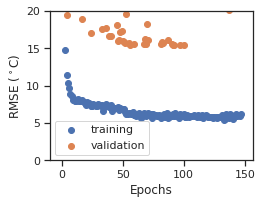


ResNetN3_OriDist
(18675, 27)
Number of iterations: 106


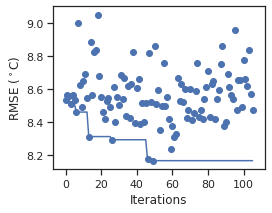

Best one: (66.67706320370394, 50, 0.07101806949103613)
epoch               9.000000
coef_det_k         -0.214798
dense1            512.000000
dense2            512.000000
dilation2           1.000000
dilation3           3.000000
dilation4           2.000000
dropout1            0.353228
dropout2            0.369972
epochs            500.000000
filters           128.000000
kernel_size1        7.000000
kernel_size21       7.000000
kernel_size22       7.000000
kernel_size31      31.000000
kernel_size32      21.000000
kernel_size41      11.000000
kernel_size42      11.000000
loss               70.145028
lr                  0.000500
mbatch             32.000000
min_delta           0.010000
patience          100.000000
pool_size1         30.000000
res_num             2.000000
val_coef_det_k      0.003245
val_loss           66.677063
Name: 9, dtype: float64

train: -0.21479764938771775
validation: 0.0032454635845548447


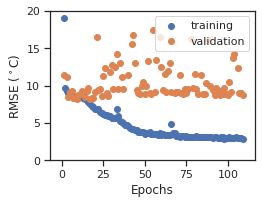


ResNetRed_OriDist
(46929, 34)
Number of iterations: 268


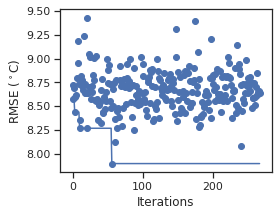

Best one: (62.38672929236676, 57, 0.1876802034285115)
epoch                      21
coef_det_k           0.159817
dense1                    256
dense2                    512
dilation2                   3
dilation3                   2
dilation4                   3
dropout1             0.407374
dropout2             0.382427
epochs                    500
filters                    64
kernel_size1               11
kernel_size21              31
kernel_size22               3
kernel_size23               3
kernel_size31              11
kernel_size32              11
kernel_size33              21
kernel_size41              21
kernel_size42               9
loss                  56.9131
lr                      0.001
mbatch                    128
min_delta                0.01
patience                  100
pool_size1                 10
pool_size2                 10
pool_type_1       "[a, v, g]"
pool_type_2       "[m, a, x]"
res_num                     3
stride_23                   3
stride_33       

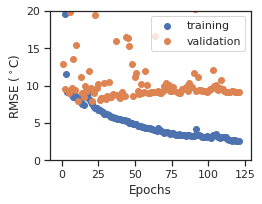


ResNetN3_UniDist
(19651, 27)
Number of iterations: 130


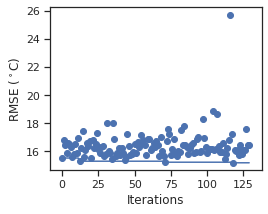

Best one: (230.92938879741004, 119, 0.7240326047487448)
epoch              73.000000
coef_det_k          0.920054
dense1            512.000000
dense2             64.000000
dilation2           1.000000
dilation3           2.000000
dilation4           2.000000
dropout1            0.171931
dropout2            0.154846
epochs            500.000000
filters           512.000000
kernel_size1        9.000000
kernel_size21      21.000000
kernel_size22      11.000000
kernel_size31       3.000000
kernel_size32       7.000000
kernel_size41      21.000000
kernel_size42      31.000000
loss               64.693334
lr                  0.000100
mbatch             32.000000
min_delta           0.010000
patience           50.000000
pool_size1         50.000000
res_num             1.000000
val_coef_det_k      0.724033
val_loss          230.929389
Name: 73, dtype: float64

train: 0.92005410145589
validation: 0.7240326047487448


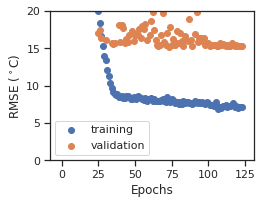

In [6]:
res_dir = 'results/'
for name in os.listdir(res_dir):
    file = os.path.join(res_dir,name,'train_val_test_history.csv')
    print(name)
    df = load_data_deep_results(file,ylim=False)
    plot(df,ylim=True)
    print()